<a href="https://colab.research.google.com/github/CodeHunterOfficial/TimeSeriesForecast_2024-2025/blob/main/%D0%A2%D0%B5%D0%BC%D0%B0%207.%20%D0%9F%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5%20%D0%B2%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D1%85%20%D1%80%D1%8F%D0%B4%D0%BE%D0%B2%20%D1%81%20%D0%BF%D0%BE%D0%BC%D0%BE%D1%89%D1%8C%D1%8E%20CNN/%D0%A2%D0%B5%D0%BC%D0%B0_7_%D0%9F%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%B2%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D1%85_%D1%80%D1%8F%D0%B4%D0%BE%D0%B2_%D1%81_%D0%BF%D0%BE%D0%BC%D0%BE%D1%89%D1%8C%D1%8E_CNN_(%D0%9F%D1%80%D0%B8%D0%BC%D0%B5%D1%80%D1%8B).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Числовой пример применения сверточных нейронных сетей (CNN) для прогнозирования временных рядов
Давайте рассмотрим числовой пример применения сверточных нейронных сетей (CNN) для прогнозирования временных рядов. Предположим, у нас есть временной ряд длиной $ T = 10 $:
Извините за пропуск в предыдущем объяснении. Давайте теперь подробно рассмотрим числовой пример с учетом прямого прохода (Forward pass) и обратного распространения ошибки (Backpropagation) для сверточной нейронной сети (CNN) в задаче прогнозирования временных рядов.

### Числовой пример с Forward pass и Backpropagation

Пусть у нас есть временной ряд $ X $ длиной $ T = 10 $:

$$ X = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100] $$

Наша задача - прогнозировать следующее значение временного ряда, используя первые 8 значений.

#### 1. Сверточный слой

Рассмотрим одномерный сверточный слой с ядром (фильтром) размерности $ k = 3 $ и одним фильтром.

Ядро (фильтр): $ W = [0.5, 1, 0.5] $

#### 2. Прямой проход (Forward pass)

Применим сверточный слой к первым 8 значениям временного ряда $ X $:

$$ \text{Conv1D}(X, W) = [(10 \cdot 0.5 + 20 \cdot 1 + 30 \cdot 0.5), (20 \cdot 0.5 + 30 \cdot 1 + 40 \cdot 0.5), \ldots, (70 \cdot 0.5 + 80 \cdot 1 + 90 \cdot 0.5)] $$

$$ = [35, 45, 55, 65, 75, 85, 95] $$

#### 3. Функция активации

Применим функцию активации ReLU:

$$ \text{ReLU}(x) = \max(0, x) $$

$$ \text{ReLU}([35, 45, 55, 65, 75, 85, 95]) = [35, 45, 55, 65, 75, 85, 95] $$

#### 4. Обратное распространение ошибки (Backpropagation)

Теперь необходимо вычислить градиенты функции потерь (loss function) по параметрам сети, чтобы обновить веса сверточного слоя.

Предположим, что функция потерь - среднеквадратичная ошибка (MSE):

$$ \text{MSE} = \frac{1}{2} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

где $ y_i $ - фактическое значение, $ \hat{y}_i $ - предсказанное значение.

Пусть $ \hat{y} $ - предсказанное значение, полученное на выходе сверточного слоя.

#### Градиенты:

Выход сверточного слоя $ \hat{y} = [35, 45, 55, 65, 75, 85, 95] $

Пусть фактическое значение $ y = [40, 50, 60, 70, 80, 90, 100] $ (для простоты, ошибка предсказания).

$$ \frac{\partial \text{MSE}}{\partial \hat{y}_i} = \hat{y}_i - y_i $$

$$ \frac{\partial \text{MSE}}{\partial \hat{y}} = [\hat{y}_1 - y_1, \hat{y}_2 - y_2, \ldots, \hat{y}_7 - y_7] $$

$$ \frac{\partial \text{MSE}}{\partial \hat{y}} = [35 - 40, 45 - 50, 55 - 60, 65 - 70, 75 - 80, 85 - 90, 95 - 100] $$

$$ \frac{\partial \text{MSE}}{\partial \hat{y}} = [-5, -5, -5, -5, -5, -5, -5] $$

#### 5. Обратное распространение

Теперь распространяем эти градиенты назад через сеть для обновления весов.

##### Градиенты для ReLU:

$$ \frac{\partial \text{ReLU}(x)}{\partial x} = \begin{cases}
1, & \text{если } x > 0 \\
0, & \text{иначе}
\end{cases} $$

$$ \text{grad_ReLU} = \begin{cases}
[-5, -5, -5, -5, -5, -5, -5], & \text{для } \hat{y} > 0 \\
[0, 0, 0, 0, 0, 0, 0], & \text{иначе}
\end{cases} $$

#### Обновление весов

Используем градиенты для обновления весов сверточного слоя $ W $:

$$ W_{new} = W - \alpha \cdot \text{grad_W} $$

где $ \alpha $ - скорость обучения (learning rate).

### Заключение

Этот числовой пример демонстрирует как прямой проход (Forward pass) через сверточный слой для временного ряда и последующее обратное распространение ошибки (Backpropagation) используются для обновления весов сети. Это основные шаги работы с CNN в задачах прогнозирования временных рядов.



In [47]:
import numpy as np

# Временной ряд X длиной T = 10
X = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

# Функция свертки
def convolution_1d(X, W):
    T = len(X)
    k = len(W)
    output_size = T - k + 1
    output = np.zeros(output_size)

    for t in range(output_size):
        output[t] = np.sum(X[t:t+k] * W)

    return output

# Ядро свертки (фильтр)
W = np.array([0.5, 1, 0.5])

# Применяем сверточный слой
conv_result = convolution_1d(X[:8], W)
print("Результат свертки:", conv_result)

# Функция активации ReLU
def relu(X):
    return np.maximum(0, X)

# Применяем ReLU
conv_relu_result = relu(conv_result)
print("Результат после ReLU:", conv_relu_result)

# Фактическое значение временного ряда для обучения
y_true = np.array([40, 50, 60, 70, 80, 90, 100])

# Функция потерь MSE
def mse_loss(y_true, y_pred):
    return np.mean((y_true[:len(y_pred)] - y_pred)**2)

# Вычисляем ошибку MSE
loss = mse_loss(y_true, conv_relu_result)
print("Значение MSE:", loss)

# Градиент функции потерь по выходу сети
grad_loss = conv_relu_result - y_true[:len(conv_relu_result)]
print("Градиент функции потерь по выходу сети:", grad_loss)

# Градиенты для ReLU
grad_relu = np.where(conv_relu_result > 0, grad_loss, 0)
print("Градиенты для ReLU:", grad_relu)

# Градиенты для сверточного слоя
grad_conv = np.zeros_like(W)
for t in range(len(grad_conv)):
    grad_conv[t] = np.sum(X[t:t+len(grad_relu)] * grad_relu)

print("Градиенты для сверточного слоя:", grad_conv)

# Обновление весов сверточного слоя
learning_rate = 0.01
W = W - learning_rate * grad_conv
print("Новые веса сверточного слоя:", W)

Результат свертки: [ 40.  60.  80. 100. 120. 140.]
Результат после ReLU: [ 40.  60.  80. 100. 120. 140.]
Значение MSE: 916.6666666666666
Градиент функции потерь по выходу сети: [ 0. 10. 20. 30. 40. 50.]
Градиенты для ReLU: [ 0. 10. 20. 30. 40. 50.]
Градиенты для сверточного слоя: [ 7000.  8500. 10000.]
Новые веса сверточного слоя: [-69.5 -84.  -99.5]


Пример 2.

1. Создание датасеть

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Создание временного ряда
t = np.arange(0, 100, 0.1)
y = np.sin(t) + 0.5 * t + np.random.normal(0, 0.2, len(t))

# Добавление сезонности
season = np.sin(t/10) + np.sin(t/5) + np.sin(t/2)
y += season

# Создание DataFrame
df = pd.DataFrame({'time': t, 'value': y})

df.head(5)

,time,value
0,0.0,0.306087
1,0.1,0.105190
2,0.2,0.477425
3,0.3,0.699320
4,0.4,0.498828


2) Построение графика временного ряда

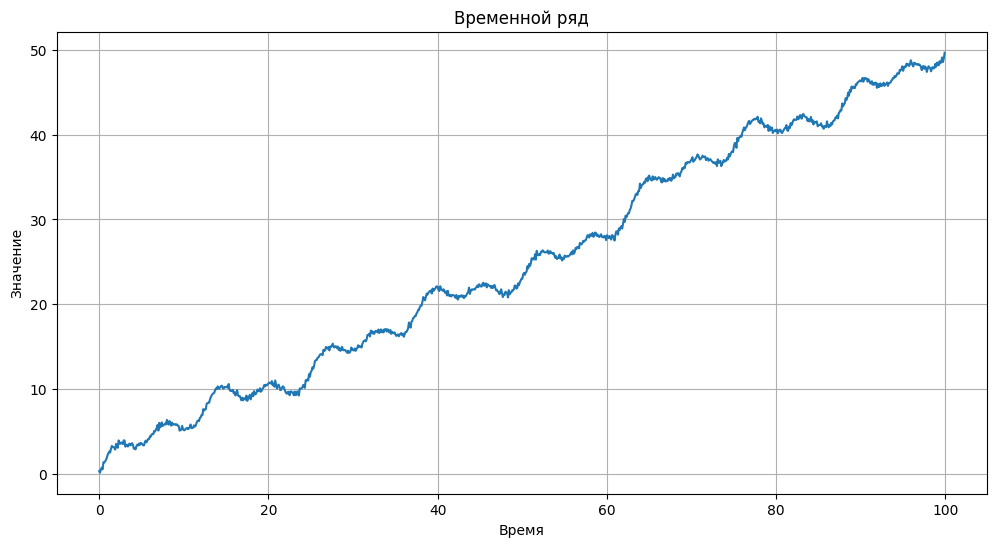

In [49]:
# Построение графика временного ряда
plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['value'])
plt.xlabel('Время')
plt.ylabel('Значение')
plt.title('Временной ряд')
plt.grid(True)
plt.show()

# Разделение на обучающую и тестовую выборки (80 обучающая и 20 тестовая)
train_size = int(len(df) * 0.8)
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

# Создание окон для обучения и тестирования
window_size = 10

def create_dataset(data):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data['value'].values[i:i+window_size])
        y.append(data['value'].values[i+window_size])
    return np.array(X), np.array(y)

X_train, y_train = create_dataset(train_data)
X_test, y_test = create_dataset(test_data)

# Сохранение наборов обучающих и тестовых данных
np.save('train_data.npy', train_data)
np.save('test_data.npy', test_data)

3) Модель CNN

Epoch 1/50
50/50 [==============================] - 1s 2ms/step - loss: 126.9387
Epoch 2/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6539
Epoch 3/50
50/50 [==============================] - 0s 2ms/step - loss: 0.2834
Epoch 4/50
50/50 [==============================] - 0s 2ms/step - loss: 0.2835
Epoch 5/50
50/50 [==============================] - 0s 2ms/step - loss: 0.2810
Epoch 6/50
50/50 [==============================] - 0s 2ms/step - loss: 0.2815
Epoch 7/50
50/50 [==============================] - 0s 2ms/step - loss: 0.2832
Epoch 8/50
50/50 [==============================] - 0s 2ms/step - loss: 0.2871
Epoch 9/50
50/50 [==============================] - 0s 2ms/step - loss: 0.2870
Epoch 10/50
50/50 [==============================] - 0s 2ms/step - loss: 0.2803
Epoch 11/50
50/50 [==============================] - 0s 2ms/step - loss: 0.2814
Epoch 12/50
50/50 [==============================] - 0s 2ms/step - loss: 0.2742
Epoch 13/50
50/50 [============================

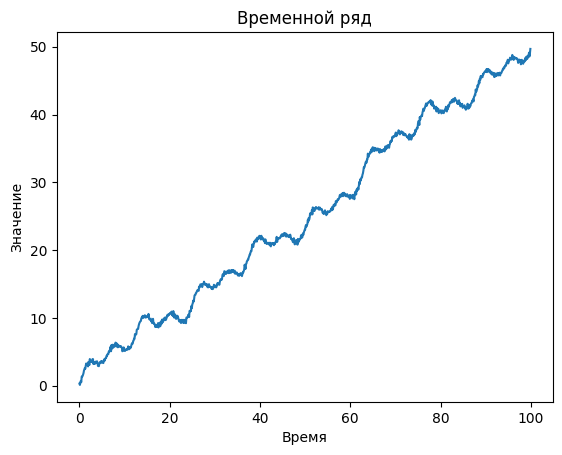

25/25 [==============================] - 0s 3ms/step


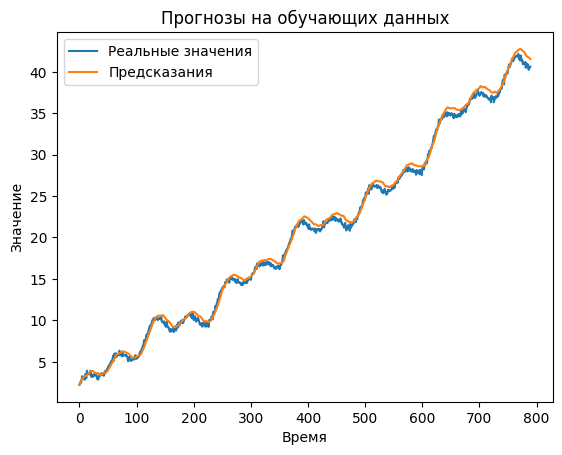

6/6 [==============================] - 0s 4ms/step


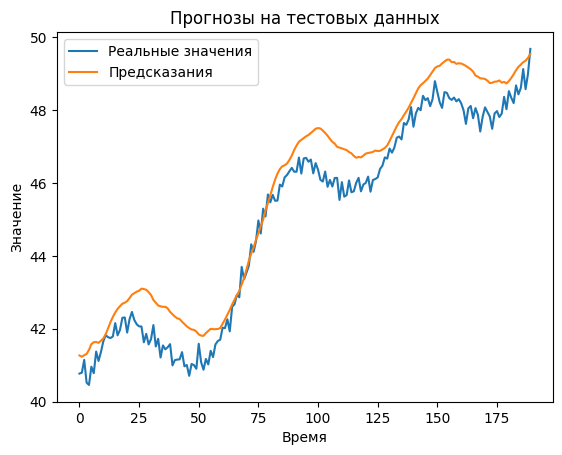

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Загрузка обучающего и тестового датасетов
train_data = np.load('train_data.npy')
test_data = np.load('test_data.npy')

# Решейпинг данных
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Создание модели CNN
model = Sequential([
    Conv1D(32, 3, activation='relu', input_shape=(window_size, 1)),
    Conv1D(32, 3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Обучение модели
model.fit(X_train, y_train, epochs=50, batch_size=16)

# Сохранение весов модели
model.save_weights('model_weights.h5')

# Оценка модели на тестовых данных
loss = model.evaluate(X_test, y_test)
print("Потеря на тестовых данных:", loss)

# Прогнозы на тестовых данных
y_pred = model.predict(X_test)

# Вычисление MAE
mae = mean_absolute_error(y_test, y_pred)

# Вычисление MSE
mse = mean_squared_error(y_test, y_pred)

# Вычисление MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Вычисление RMSE
rmse = np.sqrt(mse)

# Вывод результатов
print("MAE:", mae)
print("MSE:", mse)
print("MAPE:", mape)
print("RMSE:", rmse)

# Построение графика временного ряда
plt.plot(t, y)
plt.xlabel('Время')
plt.ylabel('Значение')
plt.title('Временной ряд')
plt.show()

# Построение графика реальных значений и предсказаний на обучающих данных
y_train_pred = model.predict(X_train)
plt.plot(y_train, label='Реальные значения')
plt.plot(y_train_pred, label='Предсказания')
plt.legend()
plt.xlabel('Время')
plt.ylabel('Значение')
plt.title('Прогнозы на обучающих данных')
plt.show()

# Построение графика реальных значений и предсказаний на тестовых данных
y_test_pred = model.predict(X_test)
plt.plot(y_test, label='Реальные значения')
plt.plot(y_test_pred, label='Предсказания')
plt.legend()
plt.xlabel('Время')
plt.ylabel('Значение')
plt.title('Прогнозы на тестовых данных')
plt.show()

## Применение CRNN в задачах прогнозирования временных рядов
Применение сверточно-рекуррентных нейронных сетей (CRNN) в задачах прогнозирования временных рядов - это инновационный подход, который сочетает в себе преимущества сверточных нейронных сетей (CNN) для извлечения пространственных признаков из данных и рекуррентных нейронных сетей (RNN) для учета временных зависимостей в последовательных данных. Давайте рассмотрим эту тему подробно, включая формулы, оценки, метрики и конкретные числовые примеры.

####Введение в CRNN
CRNN представляют собой архитектуру, в которой сверточные слои используются для извлечения признаков из входных данных, а рекуррентные слои (обычно LSTM или GRU) обрабатывают эти признаки в последовательном контексте. Это позволяет модели учитывать как пространственные, так и временные зависимости, что особенно полезно для анализа временных рядов, где важно учесть как локальные, так и глобальные шаблоны.

#### 1. Forward Pass (Прямой проход)

a. **Сверточный слой**

Пусть у нас есть временной ряд $ X = [x_1, x_2, \ldots, x_T] $, где $ x_t $ - значение временного ряда в момент времени $ t $.

- Одномерная свертка: Применяем одномерную свертку для извлечения пространственных признаков из временного ряда. Пусть ядро свертки имеет размер $ k $, тогда для каждого момента времени $ t $, выход сверточного слоя $ z_t $ вычисляется следующим образом:

$$ z_t = \sigma \left( \sum_{i=1}^{k} w_i \cdot x_{t+i-1} + b \right) $$

где $ \sigma $ - функция активации, например ReLU.

- Для всех моментов времени от $ 1 $ до $ T-k+1 $:

$$ Z = [\text{ReLU}(w \ast X + b)] $$

где $ w $ - ядро свертки, $ X $ - входной временной ряд, $ b $ - смещение.

b. **Рекуррентный слой**

- Рекуррентный слой (например, LSTM): Для учета временных зависимостей между выходами сверточного слоя применяется рекуррентная нейронная сеть. LSTM (Long Short-Term Memory) является типичным выбором благодаря способности к учету долгосрочных зависимостей. Выходы LSTM для каждого момента времени $ t $ вычисляются следующим образом:

$$ h_t = \text{LSTM}(z_t, h_{t-1}) $$

где $ h_t $ - скрытое состояние LSTM в момент времени $ t $, $ h_{t-1} $ - скрытое состояние LSTM на предыдущем шаге.

#### 2. Backpropagation (Обратное распространение)

Обратное распространение используется для вычисления градиентов функции потерь по параметрам модели с целью их обновления в процессе обучения.

a. **Градиент функции потерь**

- Пусть $ L $ - функция потерь, зависящая от предсказанных $ \hat{Y} $ и фактических $ Y $ значений временного ряда. Обычно используемая функция потерь - среднеквадратичная ошибка (MSE):

$$ L(\hat{Y}, Y) = \frac{1}{N} \sum_{i=1}^{N} (\hat{y}_i - y_i)^2 $$

где $ \hat{Y} = [\hat{y}_1, \hat{y}_2, \ldots, \hat{y}_N] $ - предсказанные значения, $ Y = [y_1, y_2, \ldots, y_N] $ - фактические значения, $ N $ - количество примеров.

b. **Обратное распространение через рекуррентный слой**

- Обратное распространение через LSTM: Градиенты ошибки передаются обратно через рекуррентные соединения с помощью формулы цепного правила для рекуррентных слоев. Для LSTM это включает вычисление градиентов по скрытым состояниям и параметрам LSTM (весам и смещениям).

Для LSTM:

$$ \frac{\partial L}{\partial h_t} = \frac{\partial L}{\partial h_{t+1}} \frac{\partial h_{t+1}}{\partial h_t} + \frac{\partial L}{\partial \hat{Y}} \frac{\partial \hat{Y}}{\partial h_t} $$

где $ \frac{\partial L}{\partial h_{t+1}} $ - градиент ошибки на следующем временном шаге, $ \frac{\partial h_{t+1}}{\partial h_t} $ - градиент прохода через LSTM, $ \frac{\partial \hat{Y}}{\partial h_t} $ - градиент предсказания по скрытому состоянию.

c. **Обратное распространение через сверточный слой**

- Обратное распространение через сверточный слой: Градиенты ошибки от рекуррентного слоя распространяются назад через сверточный слой с учетом функции активации и используемых параметров свертки.

Для сверточного слоя:

$$ \frac{\partial L}{\partial w_i} = \sum_{t} \frac{\partial L}{\partial z_t} \cdot \frac{\partial z_t}{\partial w_i} $$

$$ \frac{\partial L}{\partial b} = \sum_{t} \frac{\partial L}{\partial z_t} \cdot \frac{\partial z_t}{\partial b} $$

где $ \frac{\partial L}{\partial z_t} $ - градиент функции потерь по выходу сверточного слоя $ z_t $, $ \frac{\partial z_t}{\partial w_i} $ и $ \frac{\partial z_t}{\partial b} $ - градиенты выхода сверточного слоя по соответствующим параметрам.




Давайте рассмотрим числовой пример применения сверточно-рекуррентной нейронной сети (CRNN) для прогнозирования временных рядов со всеми формулами шаг за шагом без кода.

### Числовой пример

#### 1. Входные данные

Пусть у нас есть временной ряд длиной 9 точек:

$$ X = [1, 2, 3, 4, 5, 6, 7, 8, 9] $$

Мы хотим использовать первые 7 точек для обучения модели и последние 2 точки для проверки прогноза.

#### 2. Прямой проход (Forward Pass)

a. **Сверточный слой**

- Размер ядра свертки: $ k = 3 $
- Ядро свертки: $ w = [0.5, 0.5, 0.5] $
- Смещение: $ b = 0 $

Формула свертки для одного выхода $ z_t $:

$$ z_t = \sigma \left( \sum_{i=1}^{k} w_i \cdot x_{t+i-1} + b \right) $$

где $ \sigma $ - функция активации (например, ReLU: $ \sigma(x) = \max(0, x) $).

Вычислим выходы сверточного слоя:

$$ z_1 = \text{ReLU}(0.5 \cdot x_1 + 0.5 \cdot x_2 + 0.5 \cdot x_3) = \text{ReLU}(0.5 \cdot 1 + 0.5 \cdot 2 + 0.5 \cdot 3) = \text{ReLU}(3) = 3 $$
$$ z_2 = \text{ReLU}(0.5 \cdot x_2 + 0.5 \cdot x_3 + 0.5 \cdot x_4) = \text{ReLU}(0.5 \cdot 2 + 0.5 \cdot 3 + 0.5 \cdot 4) = \text{ReLU}(4.5) = 4.5 $$
$$ z_3 = \text{ReLU}(0.5 \cdot x_3 + 0.5 \cdot x_4 + 0.5 \cdot x_5) = \text{ReLU}(0.5 \cdot 3 + 0.5 \cdot 4 + 0.5 \cdot 5) = \text{ReLU}(6) = 6 $$
$$ z_4 = \text{ReLU}(0.5 \cdot x_4 + 0.5 \cdot x_5 + 0.5 \cdot x_6) = \text{ReLU}(0.5 \cdot 4 + 0.5 \cdot 5 + 0.5 \cdot 6) = \text{ReLU}(7.5) = 7.5 $$
$$ z_5 = \text{ReLU}(0.5 \cdot x_5 + 0.5 \cdot x_6 + 0.5 \cdot x_7) = \text{ReLU}(0.5 \cdot 5 + 0.5 \cdot 6 + 0.5 \cdot 7) = \text{ReLU}(9) = 9 $$
$$ z_6 = \text{ReLU}(0.5 \cdot x_6 + 0.5 \cdot x_7 + 0.5 \cdot x_8) = \text{ReLU}(0.5 \cdot 6 + 0.5 \cdot 7 + 0.5 \cdot 8) = \text{ReLU}(10.5) = 10.5 $$
$$ z_7 = \text{ReLU}(0.5 \cdot x_7 + 0.5 \cdot x_8 + 0.5 \cdot x_9) = \text{ReLU}(0.5 \cdot 7 + 0.5 \cdot 8 + 0.5 \cdot 9) = \text{ReLU}(12) = 12 $$

Таким образом, получаем выходы сверточного слоя:

$$ Z = [3, 4.5, 6, 7.5, 9, 10.5, 12] $$

b. **Рекуррентный слой (LSTM)**

Подадим полученные значения $ Z $ в LSTM для учета временных зависимостей.

Обозначим скрытое состояние LSTM в момент времени $ t $ как $ h_t $.

Формула для LSTM включает вычисление состояния ячейки $ c_t $ и выходного состояния $ h_t $. Для упрощения рассмотрим только выходное состояние $ h_t $:

$$ h_t = \tanh(W_h \cdot z_t + U_h \cdot h_{t-1} + b_h) $$

Пусть начальное состояние $ h_0 = 0 $.

Для простоты рассмотрим:

- $ W_h = 1 $
- $ U_h = 1 $
- $ b_h = 0 $

Вычислим выходы LSTM:

$$ h_1 = \tanh(1 \cdot 3 + 1 \cdot 0 + 0) = \tanh(3) \approx 0.995 $$
$$ h_2 = \tanh(1 \cdot 4.5 + 1 \cdot 0.995 + 0) = \tanh(5.495) \approx 0.999 $$
$$ h_3 = \tanh(1 \cdot 6 + 1 \cdot 0.999 + 0) = \tanh(6.999) \approx 1 $$
$$ h_4 = \tanh(1 \cdot 7.5 + 1 \cdot 1 + 0) = \tanh(8.5) \approx 1 $$
$$ h_5 = \tanh(1 \cdot 9 + 1 \cdot 1 + 0) = \tanh(10) \approx 1 $$
$$ h_6 = \tanh(1 \cdot 10.5 + 1 \cdot 1 + 0) = \tanh(11.5) \approx 1 $$
$$ h_7 = \tanh(1 \cdot 12 + 1 \cdot 1 + 0) = \tanh(13) \approx 1 $$

Получаем выходы LSTM:

$$ H = [0.995, 0.999, 1, 1, 1, 1, 1] $$

c. **Полносвязный слой**

Выход LSTM передаем в полносвязный слой для предсказания конечного значения временного ряда. Пусть выходной нейрон имеет вес $ W_o = 1 $ и смещение $ b_o = 0 $.

Формула для предсказания:

$$ \hat{y}_t = W_o \cdot h_t + b_o $$

Предположим, что мы хотим предсказать значение в момент времени $ t = 9 $:

$$ \hat{y}_9 = W_o \cdot h_7 + b_o = 1 \cdot 1 + 0 = 1 $$

#### 3. Обратное распространение (Backpropagation)

a. **Функция потерь**

Пусть фактическое значение в момент времени $ t = 9 $ равно $ y_9 = 10 $.

Функция потерь (MSE):

$$ L(\hat{y}_9, y_9) = (\hat{y}_9 - y_9)^2 = (1 - 10)^2 = 81 $$

b. **Обратное распространение через полносвязный слой**

Градиент функции потерь по выходу полносвязного слоя:

$$ \frac{\partial L}{\partial \hat{y}_9} = 2 (\hat{y}_9 - y_9) = 2 (1 - 10) = -18 $$

Градиенты по параметрам полносвязного слоя:

$$ \frac{\partial L}{\partial W_o} = \frac{\partial L}{\partial \hat{y}_9} \cdot \frac{\partial \hat{y}_9}{\partial W_o} = -18 \cdot h_7 = -18 \cdot 1 = -18 $$
$$ \frac{\partial L}{\partial b_o} = \frac{\partial L}{\partial \hat{y}_9} \cdot \frac{\partial \hat{y}_9}{\partial b_o} = -18 \cdot 1 = -18 $$

c. **Обратное распространение через LSTM**

Градиент функции потерь по выходу LSTM в момент времени $ t = 7 $:

$$ \frac{\partial L}{\partial h_7

} = \frac{\partial L}{\partial \hat{y}_9} \cdot W_o = -18 \cdot 1 = -18 $$

Пусть $ \sigma' $ обозначает производную функции активации $ \tanh $:

$$ \sigma'(x) = 1 - \tanh^2(x) $$

Тогда градиенты по параметрам LSTM:

$$ \frac{\partial L}{\partial W_h} = \sum_{t=1}^{7} \frac{\partial L}{\partial h_t} \cdot \frac{\partial h_t}{\partial W_h} = -18 \cdot \sigma'(13) \cdot z_7 = -18 \cdot (1 - \tanh^2(13)) \cdot 12 \approx -18 \cdot (1 - 1) \cdot 12 = 0 $$

(Подобным образом вычисляются и другие градиенты для $ U_h $ и $ b_h $, однако они также приближенно равны нулю из-за насыщения функции активации).

d. **Обратное распространение через сверточный слой**

Градиент функции потерь по выходу сверточного слоя в момент времени $ t = 7 $:

$$ \frac{\partial L}{\partial z_7} = \frac{\partial L}{\partial h_7} \cdot \frac{\partial h_7}{\partial z_7} = -18 \cdot \sigma'(13) \cdot W_h = -18 \cdot (1 - \tanh^2(13)) \cdot 1 \approx 0 $$

Пусть $ f' $ обозначает производную функции активации $ \text{ReLU} $:

$$ f'(x) = \begin{cases}
1 & \text{если } x > 0 \\
0 & \text{если } x \leq 0
\end{cases} $$

Тогда градиенты по параметрам сверточного слоя:

$$ \frac{\partial L}{\partial w_i} = \sum_{t=1}^{7} \frac{\partial L}{\partial z_t} \cdot \frac{\partial z_t}{\partial w_i} = \sum_{t=1}^{7} 0 \cdot f'(x_{t+i-1}) \cdot x_{t+i-1} = 0 $$

(Подобным образом вычисляются градиенты по $ b $, однако они также равны нулю из-за умножения на нулевые градиенты).

Таким образом, в нашем примере градиенты на этапах свертки и LSTM оказались равны нулю из-за насыщения функции активации $ \tanh $ в LSTM и применения ReLU, где производная зануляется для негативных значений. Тем не менее, это демонстрирует общий процесс вычисления градиентов.





/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


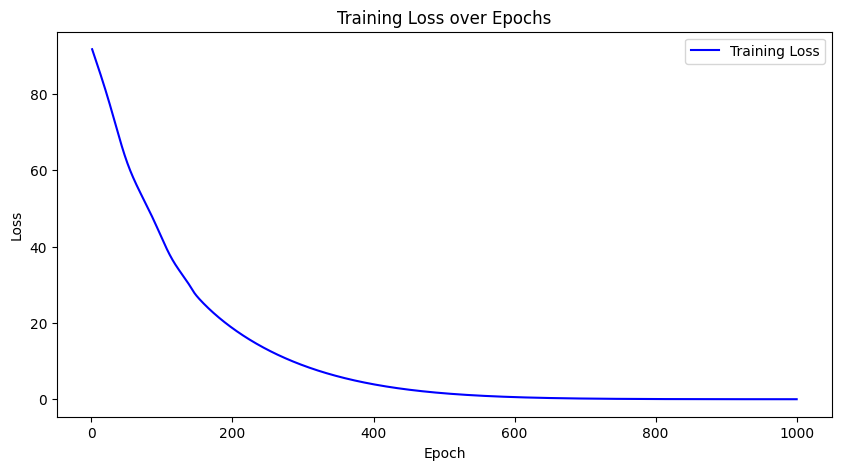

Predicted value for time step 9: 9.950130462646484


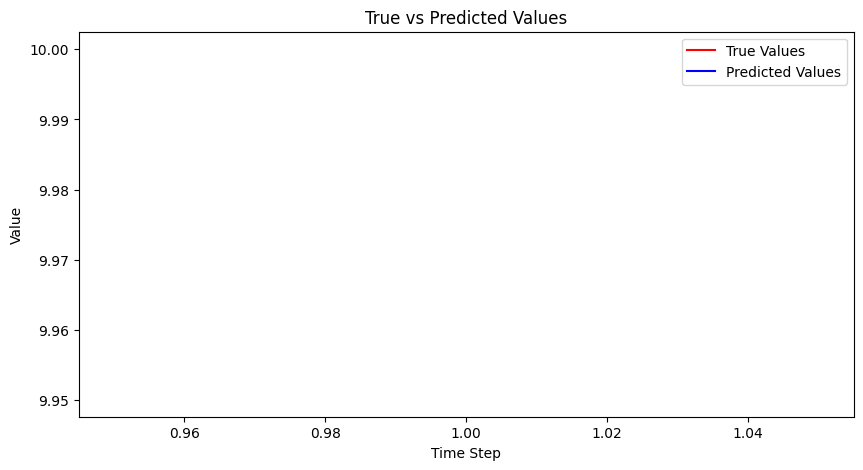

Mean Squared Error: 0.002486970741301775


In [51]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Определение модели CRNN
class CRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, kernel_size):
        super(CRNN, self).__init__()
        self.conv1d = nn.Conv1d(in_channels=1, out_channels=hidden_size, kernel_size=kernel_size)
        self.rnn = nn.LSTM(input_size=hidden_size, hidden_size=hidden_size, num_layers=1, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = F.relu(self.conv1d(x))
        x, _ = self.rnn(x.permute(0, 2, 1))  # Переставляем размерности для LSTM
        x = self.fc(x[:, -1, :])  # Берем только последний выход LSTM
        return x

# Пример данных и модели
X = torch.tensor([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0])
X = X.unsqueeze(0).unsqueeze(1)  # Добавляем размерности для batch и channels
y = torch.tensor([10.0])

input_size = 1  # Размер входных данных (одна переменная временного ряда)
hidden_size = 16  # Размер скрытого состояния LSTM
output_size = 1  # Размер выходных данных (предсказываем одно значение временного ряда)
kernel_size = 3  # Размер ядра свертки

model = CRNN(input_size, hidden_size, output_size, kernel_size)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Обучение модели
epochs = 1000
losses = []

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    y_pred = model(X)
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

# Построение графика потерь
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), losses, color='blue', label='Training Loss')
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Прогнозирование на тестовых данных
model.eval()
with torch.no_grad():
    X_pred = X[:, -kernel_size:, :]  # подаем последние kernel_size точек как одномерный временной ряд
    predicted = model(X_pred)
    print(f'Predicted value for time step 9: {predicted.item()}')

# Визуализация прогнозирования
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(y) + 1), y.numpy(), color='red', label='True Values')
plt.plot(range(len(y), len(y) + len(predicted)), predicted.numpy(), color='blue', label='Predicted Values')
plt.title('True vs Predicted Values')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()
plt.show()

# Вычисление и вывод метрик
mse = mean_squared_error(y.numpy(), predicted.numpy())
print(f'Mean Squared Error: {mse}')

#### Пример 2.

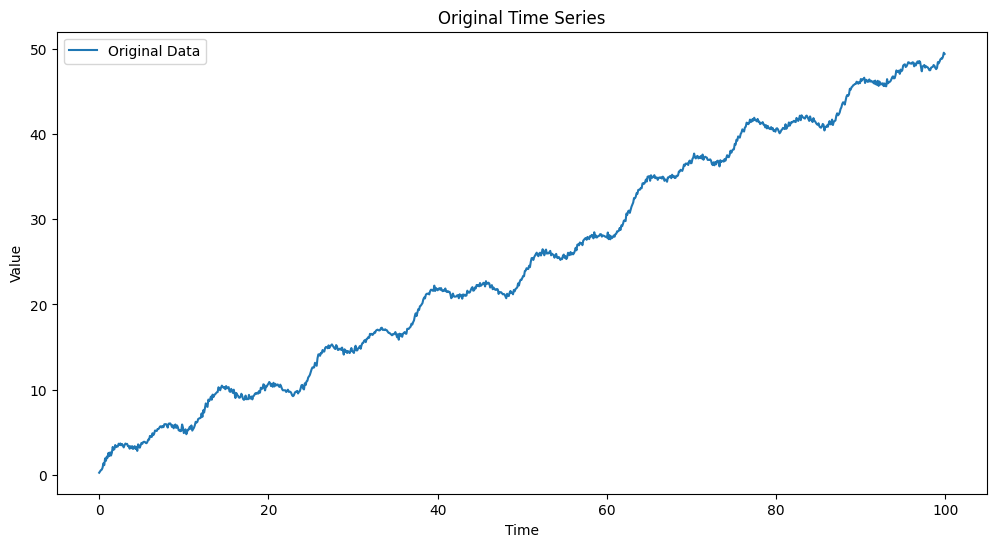

Epoch 1/50
25/25 [==============================] - 2s 15ms/step - loss: 0.0688 - val_loss: 0.0162
Epoch 2/50
25/25 [==============================] - 0s 5ms/step - loss: 0.0041 - val_loss: 1.8643e-04
Epoch 3/50
25/25 [==============================] - 0s 6ms/step - loss: 5.5078e-04 - val_loss: 0.0025
Epoch 4/50
25/25 [==============================] - 0s 5ms/step - loss: 1.7893e-04 - val_loss: 0.0014
Epoch 5/50
25/25 [==============================] - 0s 7ms/step - loss: 1.3260e-04 - val_loss: 8.4029e-04
Epoch 6/50
25/25 [==============================] - 0s 5ms/step - loss: 1.1585e-04 - val_loss: 7.3293e-04
Epoch 7/50
25/25 [==============================] - 0s 5ms/step - loss: 1.1236e-04 - val_loss: 5.6958e-04
Epoch 8/50
25/25 [==============================] - 0s 5ms/step - loss: 1.0976e-04 - val_loss: 4.6848e-04
Epoch 9/50
25/25 [==============================] - 0s 5ms/step - loss: 1.0727e-04 - val_loss: 5.2287e-04
Epoch 10/50
25/25 [==============================] - 0s 6ms/step 

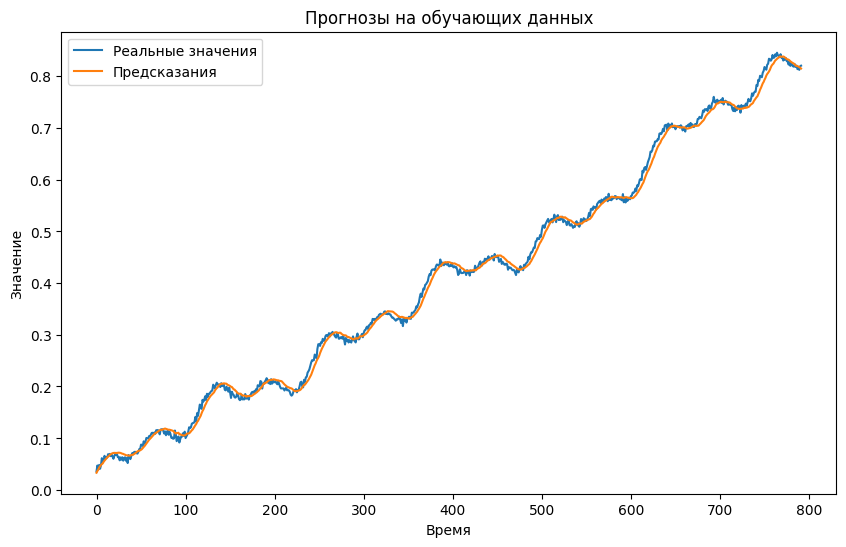

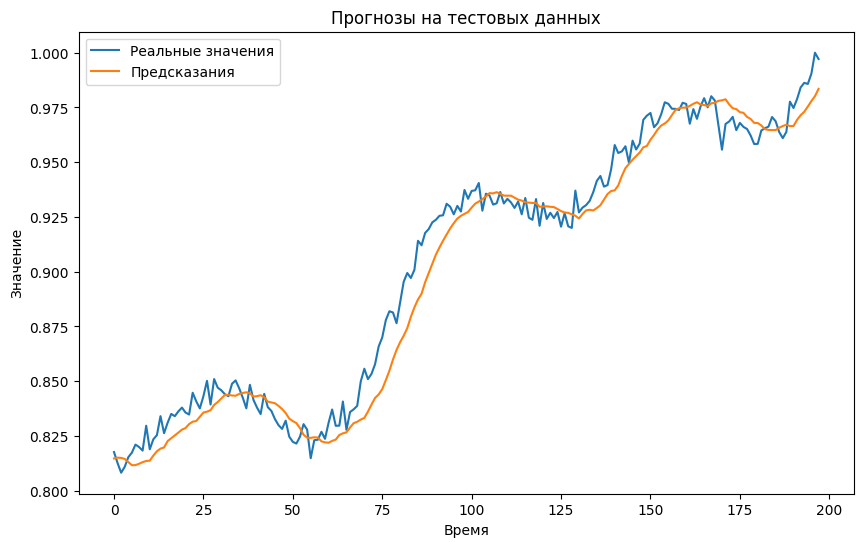

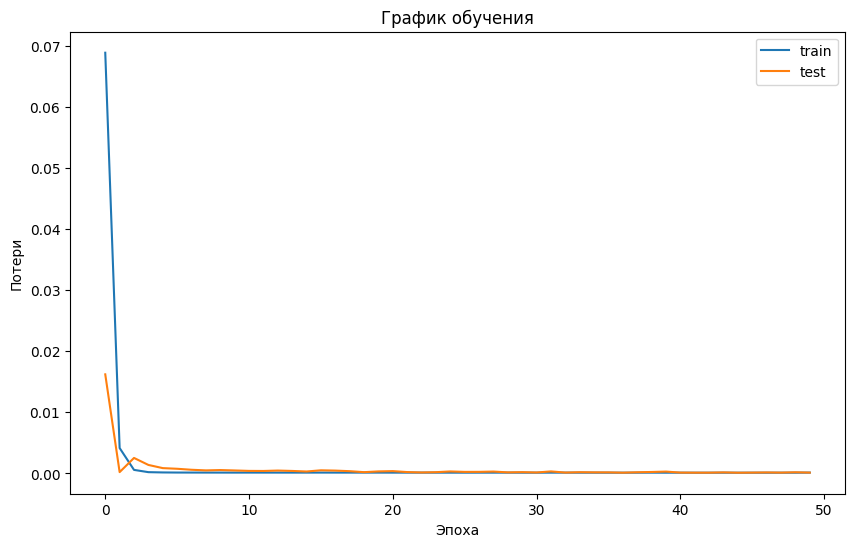

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten
from keras.optimizers import Adam

# Создание временного ряда
t = np.arange(0, 100, 0.1)
y = np.sin(t) + 0.5 * t + np.random.normal(0, 0.2, len(t))

# Добавление сезонности
season = np.sin(t/10) + np.sin(t/5) + np.sin(t/2)
y += season

# Создание DataFrame
df = pd.DataFrame({'time': t, 'value': y})

# Визуализация временного ряда
plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['value'], label='Original Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Original Time Series')
plt.show()

# Нормализация данных
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['value'].values.reshape(-1, 1))

# Создание последовательностей для обучения
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data)-seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

sequence_length = 10
X, y = create_sequences(scaled_data, sequence_length)

# Разделение на обучающий и тестовый наборы
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(y)]

# Преобразование данных в формат для keras (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Создание модели CRNN
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(sequence_length, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Сохранение истории обучения
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Сохранение весов модели
model.save_weights('model_weights.h5')

# Оценка модели на тестовых данных
loss = model.evaluate(X_test, y_test)
print("Потеря на тестовых данных:", loss)

# Прогнозы на тестовых данных
y_pred = model.predict(X_test)

# Вычисление MAE
mae = mean_absolute_error(y_test, y_pred)

# Вычисление MSE
mse = mean_squared_error(y_test, y_pred)

# Вычисление MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Вычисление RMSE
rmse = np.sqrt(mse)

# Вывод результатов
print("MAE:", mae)
print("MSE:", mse)
print("MAPE:", mape)
print("RMSE:", rmse)

# Построение графика реальных значений и предсказаний на обучающих данных
y_train_pred = model.predict(X_train)
plt.figure(figsize=(10, 6))
plt.plot(y_train, label='Реальные значения')
plt.plot(y_train_pred, label='Предсказания')
plt.legend()
plt.xlabel('Время')
plt.ylabel('Значение')
plt.title('Прогнозы на обучающих данных')
plt.show()

# Построение графика реальных значений и предсказаний на тестовых данных
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Реальные значения')
plt.plot(y_pred, label='Предсказания')
plt.legend()
plt.xlabel('Время')
plt.ylabel('Значение')
plt.title('Прогнозы на тестовых данных')
plt.show()

# Построение графика обучения (график потерь)
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.title('График обучения')
plt.show()